In [23]:
########################################
# importing packages
########################################
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


########################################
# loading data and setting display options
########################################
# loading data
survay_df = pd.read_excel('sample_survey_results-1.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

User-Defined Functions
Run the following code to load the user-defined functions used throughout this Notebook

In [24]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [25]:
# checking information about each column
survay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 79 columns):
surveyID                                                                        10 non-null object
Am the life of the party                                                        10 non-null int64
Feel little concern for others                                                  10 non-null int64
Am always prepared                                                              10 non-null int64
Get stressed out easily                                                         10 non-null int64
Have a rich vocabulary                                                          10 non-null int64
Don't talk a lot                                                                10 non-null int64
Am interested in people                                                         10 non-null int64
Leave my belongings around                                                      10 non-null int64
Am relaxed most

In [31]:
# summary of decriptive statistics
survay_df.describe().round(2)

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.0,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.0,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.0
mean,3.30,3.70,3.60,3.30,3.00,2.70,3.50,2.50,3.70,2.30,3.10,1.90,4.00,3.60,3.60,3.50,3.60,2.70,3.30,2.70,3.30,2.70,2.80,3.10,3.50,2.80,3.50,2.60,2.30,2.30,2.90,2.6,3.40,3.00,4.10,3.40,3.60,2.70,2.40,2.50,3.10,3.60,3.50,3.00,3.60,3.50,3.80,3.6,2.60,3.30,3.60,2.70,3.80,4.10,4.20,3.60,3.90,4.20,3.70,4.00,4.10,2.90,3.90,4.20,3.90,2.80,3.90,3.90,4.30,3.90,4.4
std,1.16,0.95,1.07,1.34,0.82,0.82,1.08,1.18,1.06,1.16,1.10,1.10,1.25,1.07,1.17,0.85,0.97,1.06,0.95,0.82,0.82,1.06,0.92,1.10,0.71,0.79,1.08,0.97,0.82,0.95,0.74,0.7,1.35,1.05,0.57,1.17,0.52,0.48,1.17,0.85,0.99,0.84,1.18,1.41,1.17,0.71,0.79,0.7,1.07,0.82,0.52,0.82,0.92,0.74,0.63,0.97,0.74,0.63,0.95,0.67,0.57,0.74,0.74,0.63,0.88,1.23,0.74,0.99,0.82,0.74,0.7
min,1.00,2.00,2.00,1.00,2.00,1.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,3.00,2.00,1.00,2.00,1.00,1.00,2.00,2.0,1.00,1.00,3.00,1.00,3.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,3.00,3.00,3.0,1.00,2.00,3.00,2.00,2.00,3.00,3.00,2.00,3.00,3.00,2.00,3.00,3.00,2.00,3.00,3.00,2.00,1.00,3.00,2.00,3.00,3.00,3.0
25%,3.00,3.00,3.00,2.25,2.25,2.25,3.00,2.00,3.00,1.25,2.25,1.00,4.00,3.25,3.00,3.00,3.25,2.00,3.00,2.00,3.00,2.00,2.25,2.25,3.00,2.00,3.00,2.00,2.00,2.00,2.25,2.0,3.00,2.25,4.00,3.00,3.00,2.25,1.25,2.00,2.25,3.00,3.25,2.00,3.00,3.00,3.00,3.0,2.00,3.00,3

In [27]:
##3for renaming columns


#CountryCode             = 'CountryCode'
CountryName             = 'CountryName'
HultRegion              = 'Hult Region'
CoolName                = 'Cool Name'
ElectricityAccessTotal  = 'ElectricityAccessTotal'
ElectricityRuralAccess  = 'ElectricityRuralAccess'
ElectricityUrbanAccess  = 'ElectricityUrbanAccess'
AdolescentFertility     = 'AdolescentFertility'
AgeDependencyTotal      = 'AgeDependencyTotal'
AgeDependencyOld        = 'AgeDependencyOld'
AgeDependencyYoung      = 'AgeDependencyYoung'
GDP_AgriForFish         = 'GDP_PrimaryActivities'
ArmedForces             = 'ArmedForces'
BirthRate               = 'BirthRate'
BirthSkilledStaff       = 'BirthSkilledStaff'
DeathRate               = 'DeathRate'
EducationPHD            = 'EducationPHD'
EducationBachelor       = 'EducationBachelor'
EducationMaster         = 'EducationMaster'
EducationLowerSecondary = 'EducationLowerSecondary'
EducationPostSecondary  = 'EducationPostSecondary'
EducationPrimary        = 'EducationPrimary'
EducationTertiary       = 'EducationTertiary'
EducationUpperSecondary = 'EducationUpperSecondary'
EmploymentAgriculture   = 'EmploymentAgriculture'
EmploymentIndustry      = 'EmploymentIndustry'
EmploymentServices      = 'EmploymentServices'
FertilityRate           = 'FertilityRate'
GDP                     = 'GDP'
GDPGrowth               = 'GDPGrowth'
GINI                    = 'GINI'
ExpendEducation         = 'ExpendEducation'
IncomeFourth            = 'IncomeFourth'
IncomeFifth             = 'IncomeFifth'
IncomeFirst             = 'IncomeFirst'
IncomeSecond            = 'IncomeSecond'
IncomeThird             = 'IncomeThird'
GDP_Industry            = 'GDP_Industry'
LifeExpectancy          = 'LifeExpectancy'
LiteracyAdult           = 'LiteracyAdult'
LiteracyYouth           = 'LiteracyYouth'
GDP_Merchandise         = 'GDP_Merchandise'
ExpendMilitary          = 'ExpendMilitary'
MobileSubs              = 'MobileSubs'
PovertyByHealthcare     = 'PovertyByHealthcare'
Population0_14          = 'Population0_14'
Population15_64         = 'Population15_64'
Population65            = 'Population65+'
PopulationDensity       = 'PopulationDensity'
PopulationGrowth        = 'PopulationGrowth'
PopulationLargestCity   = 'PopulationLargestCity'
PopulationSlums         = 'PopulationSlums'
PopulationFemale        = 'PopulationFemale'
PopulationMale          = 'PopulationMale'
PopulationTotal         = 'PopulationTotal'
Poverty_1               = 'Poverty_1.90'
Poverty_3               = 'Poverty_3.20'
Poverty_NationalLine    = 'Poverty_NationalLine'
HIV                     = 'HIV'
Undernourishment        = 'Undernourishment'
Underweight             = 'Underweight'
PopulationRural         = 'PopulationRural'
GDP_Services            = 'GDP_Services'
SurfaceArea             = 'SurfaceArea'
TaxRevenue              = 'TaxRevenue'
PopulationUrban         = 'PopulationUrban'
PopulationUrbanGrowth   = 'PopulationUrbanGrowth'

newColumns=[#CountryCode,
            CountryName, HultRegion, CoolName, ElectricityAccessTotal, ElectricityRuralAccess,\
            ElectricityUrbanAccess, AdolescentFertility, AgeDependencyTotal, AgeDependencyOld, AgeDependencyYoung, GDP_AgriForFish,\
            ArmedForces, BirthRate, BirthSkilledStaff, DeathRate, EducationPHD, EducationBachelor, \
            EducationMaster, EducationLowerSecondary, EducationPostSecondary, EducationPrimary, EducationTertiary, EducationUpperSecondary,\
            EmploymentAgriculture, EmploymentIndustry, EmploymentServices, FertilityRate, GDP, GDPGrowth,\
            GINI, ExpendEducation, IncomeFourth, IncomeFifth, IncomeFirst, IncomeSecond,\
            IncomeThird, GDP_Industry, LifeExpectancy, LiteracyAdult, LiteracyYouth, GDP_Merchandise,\
            ExpendMilitary, MobileSubs, PovertyByHealthcare, Population0_14, Population15_64, Population65,\
            PopulationDensity, PopulationGrowth, PopulationLargestCity, PopulationSlums, PopulationFemale, PopulationMale,\
            PopulationTotal, Poverty_1, Poverty_3, Poverty_NationalLine, HIV, Undernourishment,\
            Underweight, PopulationRural, GDP_Services, SurfaceArea, TaxRevenue, PopulationUrban,\
            PopulationUrbanGrowth]

worldData_df.columns = newColumns


NameError: name 'worldData_df' is not defined

Challenge 5

Complete the following in the code below:
    
drop demographic data and store the result as purchase_behavior

instantiate a StandardScaler() object

fit the scaler object to purchase_behavior

transform purchase_behavior using the scaler object

In [42]:
# dropping demographic information
purchase_behavior = survay_df.drop(['What laptop do you currently have?', 'What program are you in?','What is your age?','Gender','What is your ethnicity?',],
                                     axis = 1)  
         
        
#I am taking of the demographic data which is age, weather they use windows or mac ,their progrm and etc. however
#when I am trying to drop nationality too it gives an error ( so I took it of for now, but we can have a look I am not sure)
        
        

KeyError: "['What laptop do you currently have?' 'What program are you in?'\n 'What is your age?' 'Gender' 'What is your ethnicity?'] not found in axis"

In [41]:
behavior=survay_df.iloc[:,1:53]
hult_dna=survay_df.iloc[:,53:72]

# INSTANTIATING a StandardScaler() object
scaler=StandardScaler()

# FITTING the scaler with the data
scaler.fit(behavior)

# TRANSFORMING our data after fit
X_scaled=scaler.transform(behavior)

# converting scaled data into a DataFrame
behavior_scaled=pd.DataFrame(X_scaled)

# reattaching column names
behavior_scaled.columns=behavior.columns


# checking pre- and post-scaling variance
print(pd.np.var(behavior), 'n\n\n')
print(pd.np.var(behavior_scaled))

Am the life of the party                                 1.21
Feel little concern for others                           0.81
Am always prepared                                       1.04
Get stressed out easily                                  1.61
Have a rich vocabulary                                   0.60
Don't talk a lot                                         0.61
Am interested in people                                  1.05
Leave my belongings around                               1.25
Am relaxed most of the time                              1.01
Have difficulty understanding abstract ideas             1.21
Feel comfortable around people                           1.09
Insult people                                            1.09
Pay attention to details                                 1.40
Worry about things                                       1.04
Have a vivid imagination                                 1.24
Keep in the background                                   0.65
Sympathi

# Part II: Exploratory Data Analysis


Run the following code to produce histograms for all features related to purchasing behavior.

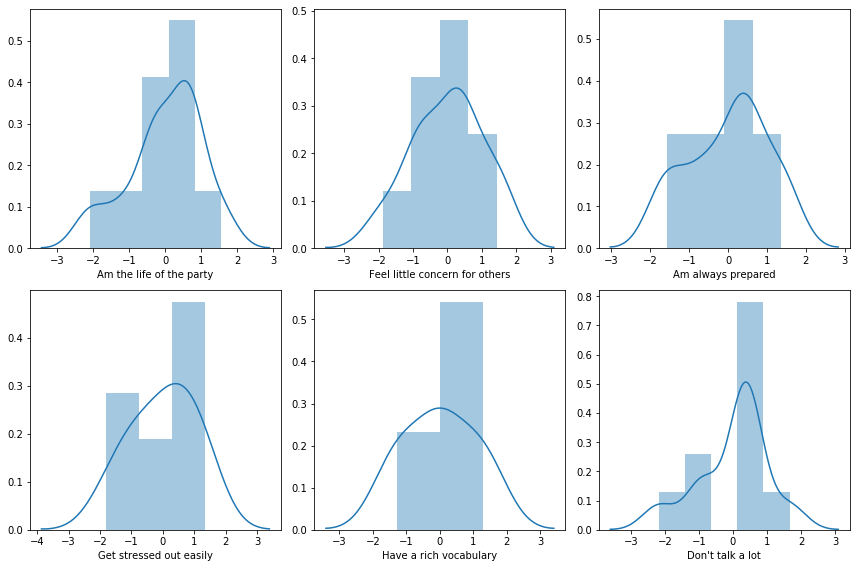

In [44]:
# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))


# initializing a counter
count = 0


# looping to create visualizations
for col in behavior_scaled:

    # condition to break
    if count == 6:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(2, 3, count)
    sns.distplot(a = behavior_scaled[col],
                 hist = True,
                 kde = True)
    
plt.tight_layout()
plt.savefig('behavior_scaled_plots.png')
plt.show()

#this is information overload, we want to kick it out from our analysis unless we want to explain all of it 

Challenge 6

Fill in the blanks below to develop a correlation heatmap of the scaled purchasing features.

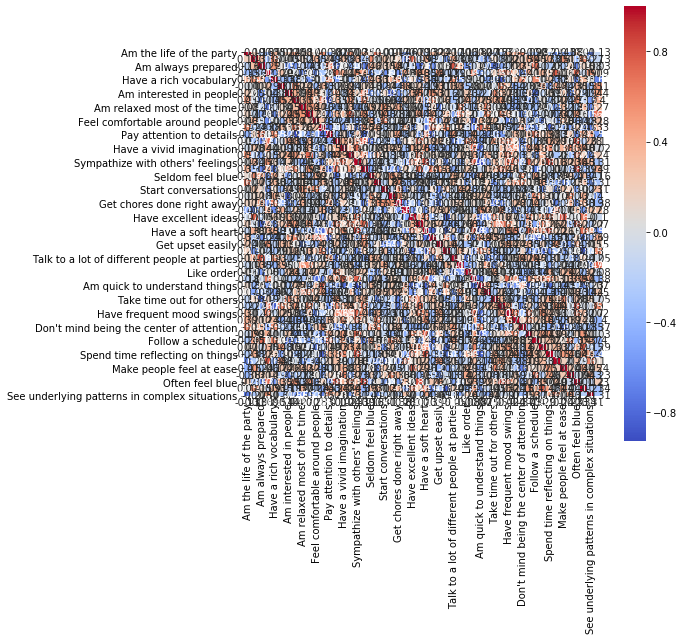

In [46]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = behavior_scaled.corr().round(2)


# creating a correlation heatmap
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True)


# saving and displaying the heatmap
plt.savefig('top_customers_correlation_heatmap.png')
plt.show()

#PCA loves high correletions 

# Part III: Principal Component Analysis

Challenge 7

Complete the code to instantiate, fit, and transform a PCA model with no limits to its number of principal components. Make sure to use the scaled dataset for this task.

In [48]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
                   random_state = 802)


# FITTING and TRANSFORMING the scaled data
user_pca = pca.fit_transform(X_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", X_scaled.shape)
print("PCA shape     :",  user_pca.shape)

#building a simple model for PCA 

Original shape: (10, 52)
PCA shape     : (10, 10)


In [49]:
user_pca

array([[-1.94489426e+00,  1.83079687e+00, -6.98847951e-02,
        -1.25034784e-01,  2.58089374e+00, -3.22971260e+00,
         7.42669002e-01, -2.10204271e-01,  2.56108984e+00,
         6.77417727e-16],
       [-2.90135225e+00, -6.83827808e-01,  7.71754214e-02,
        -3.52926676e+00, -2.85745487e+00, -1.61674604e+00,
        -3.48161714e+00,  8.15394000e-01, -1.38160289e-01,
         6.77417727e-16],
       [ 1.18697452e+00,  7.38245954e+00,  2.96312790e-01,
         3.15688276e+00, -1.48201928e+00,  1.05834517e+00,
        -1.65471413e+00, -1.42257426e+00, -3.22458634e-02,
         6.77417727e-16],
       [-3.59032360e+00, -3.68370596e+00,  5.53240334e+00,
         1.02646037e+00, -7.68399547e-01,  1.87112265e+00,
         9.14869559e-01, -9.26020316e-01,  4.09917659e-01,
         6.77417727e-16],
       [ 7.94428429e-01, -8.72369308e-01,  8.90930426e-01,
         3.87945633e+00,  5.22371921e-01, -1.95269356e+00,
         1.82741557e-01,  2.99846806e+00, -1.30176187e+00,
         6.

# Part IV: Evaluating PCA Algorithms

As can be observed from above, the shape of the data did not change. However, the original DataFrame contains features, whereas the new DataFrame contains principal components. Before analyzing the factor loadings of each principal component, it is important to check each component's explained variance ratio. Also note that the sum of all explained variance ratios should sum to 1.0.


Challenge 8

Write code to loop over each principal component, printing its component number as well as its explained_variance_ratio_

In [51]:
# component number counter
component_number = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")
    #for our component 0 it is expaning 0.44 or 44 % of our data 
    

PC 1 : 0.237
PC 2 : 0.222
PC 3 : 0.12
PC 4 : 0.112
PC 5 : 0.087
PC 6 : 0.081
PC 7 : 0.068
PC 8 : 0.042
PC 9 : 0.029
PC 10 : 0.0


Challenge 10

Call the scree_plot function on the PCA object.

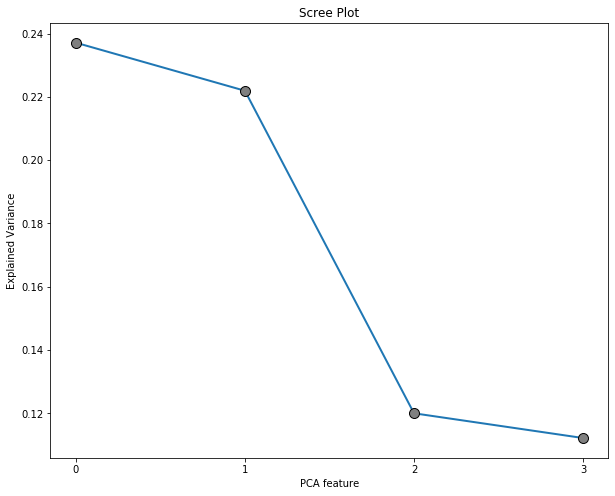

In [57]:
pca=PCA(n_components=4,random_state=802)
behav_pca=pca.fit_transform(behavior_scaled)
scree_plot(pca_object=pca) #2 components is the best

#check the function to check variance in case it gets confused with more obs!!!

OPTIONAL STEP

Run the following code to compare the variance of the unlimited PCA model with the variance of the reduced PCA model. We are doing this in this script simply to show that the explain variance in each principal component does not change after dropping smaller PCs.

In [76]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(behavior_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(behavior_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                                          0     1     2     3
Am the life of the party                               0.07  0.00  0.18  0.25
Feel little concern for others                        -0.12  0.07  0.20 -0.02
Am always prepared                                    -0.09  0.21 -0.08  0.09
Get stressed out easily                               -0.09 -0.21 -0.22  0.03
Have a rich vocabulary                                -0.13  0.20  0.07  0.04
Don't talk a lot                                       0.04 -0.08 -0.06  0.15
Am interested in people                                0.08 -0.18  0.11 -0.04
Leave my belongings around                             0.17 -0.14  0.11  0.03
Am relaxed most of the time                            0.11  0.06  0.28 -0.03
Have difficulty understanding abstract ideas           0.11 -0.15  0.24 -0.00
Feel comfortable around people                         0.15  0.07  0.17 -0.21
I

# Part V: Interpreting Principal Components and Persona Development

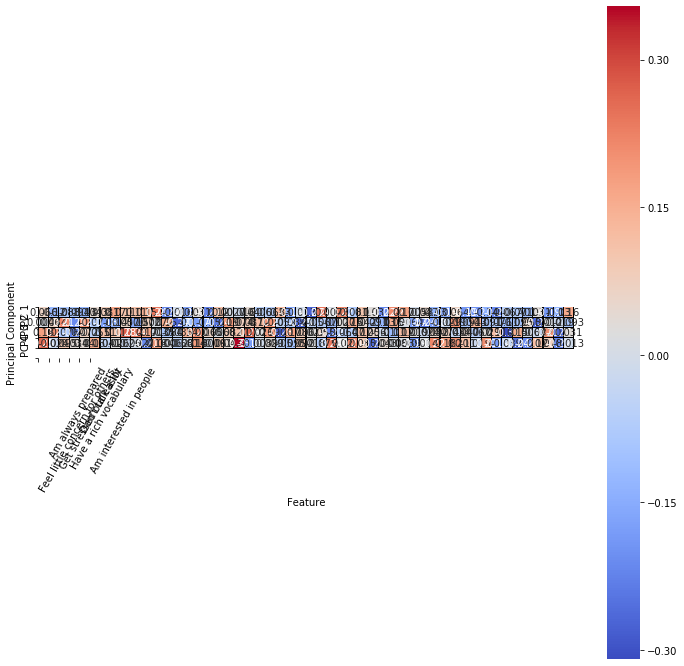

In [58]:
# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options
plt.yticks([0, 1, 2, 3, 4, 5],
           ["PC 1", "PC 2", "PC 3", "PC 4"])

plt.xticks(range(0, 6),
           customers_df.columns[2:],
           rotation=60,
           ha='left')

plt.xlabel("Feature")
plt.ylabel("Principal Component")


# displaying the plot
plt.show()

Challenge 11

Run the following code. With your team, analyze the factor loadings and develop a persona for each principal component. When finished, rename the columns of the table with your team's persona names.

In [80]:
# transposing pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(behavior_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
factor_loadings_df.to_excel('user_factor_loadings.xlsx')

                                                              0         1         2         3
Am the life of the party                               0.066477  0.004623  0.179110  0.254738
Feel little concern for others                        -0.120805  0.074226  0.202913 -0.023873
Am always prepared                                    -0.088103  0.214684 -0.075540  0.094912
Get stressed out easily                               -0.094266 -0.210297 -0.215791  0.033592
Have a rich vocabulary                                -0.130706  0.201055  0.071936  0.039666
Don't talk a lot                                       0.043119 -0.076937 -0.055197  0.151233
Am interested in people                                0.080540 -0.176418  0.111066 -0.040515
Leave my belongings around                             0.165782 -0.136199  0.110067  0.026280
Am relaxed most of the time                            0.105869  0.057175  0.276125 -0.025700
Have difficulty understanding abstract ideas           0.111

In [81]:
# naming each principal component
factor_loadings_df.columns = ['something 1',
                             'something 2',
                             'something 3',
                             'something 4']


# checking the result
factor_loadings_df.round(2)

#creting the column names 
#the names do notgive us any inforamtion herbivors ,
#we can go to marketing team and ask to understand what kind of people they are
#for exam, thin about the customer, who they are, where do they work, what they do, who are their family
#what's driving customers into the stors 

,something 1,something 2,something 3,something 4
Am the life of the party,0.07,0.00,0.18,0.25
Feel little concern for others,-0.12,0.07,0.20,-0.02
Am always prepared,-0.09,0.21,-0.08,0.09
Get stressed out easily,-0.09,-0.21,-0.22,0.03
Have a rich vocabulary,-0.13,0.20,0.07,0.04
Don't talk a lot,0.04,-0.08,-0.06,0.15
Am interested in people,0.08,-0.18,0.11,-0.04
Leave my belongings around,0.17,-0.14,0.11,0.03
Am relaxed most of the time,0.11,0.06,0.28,-0.03
Have difficulty understanding abstract ideas,0.11,-0.15,0.24,-0.00


Customer-Level Personas
Earlier in this script we instantiated, fit, and transformed the dataset's original features into principal components:

# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(X_scaled)

Now that we have developed personas, we can analyze how much each customer fits into each group. Run the following code to view the personas and factor loadings for each customer.

In [78]:
# converting into a DataFrame 
user_pca = pd.DataFrame(user_pca)


# renaming columns
user_pca.columns = factor_loadings_df.columns


# checking results
user_pca.round(2).sort_values(by= 'something 1',
                                 ascending = False)
#now we know exactly who to target 
#-2.72 this are the customers we want to target 
#make cut of like 264 i tak like 1 above one the second columin nayel
#kam dnel ascending = True  u klini hakarak@ - es ma#rdik chen sirum es en and etc


#counts per havy loading 
#customer_pca(['Herbivores'][customer_pca'Herbivores'] > 1.0 ]


ValueError: Length mismatch: Expected axis has 10 elements, new values have 4 elements

In [73]:
customer_pca['something 4'][customer_pca['something 4'] > 1.0]

KeyError: 'something 4'

Run the following code to add labels to categorical variables. If you (optionally) named your clusters, make sure to label these as well.

In [ ]:
# renaming channels
channel_names = {1 : 'Online',
                 2 : 'Mobile'}


final_pca_clust_df['Channel'].replace(channel_names, inplace = True)



# renaming regions
region_names = {1 : 'Alameda',
                2 : 'San Francisco',
                3 : 'Contra Costa'}


final_pca_clust_df['Region'].replace(region_names, inplace = True)


# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df